# HOUSING PRICE PREDICTION




## IMPORTING REQUIRED LIBRARIES

In [574]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
DeprecationWarning('ignore')
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (5,5)

## LOADING DATASET

In [575]:
df1=pd.read_csv("House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [576]:
df1.shape

(13320, 9)

## There are 13320 rows with 9 columns i.e. features

In [577]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## DATA CLEANING

## Setting up our required data

In [578]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## There are some missing values in the data

<AxesSubplot:>

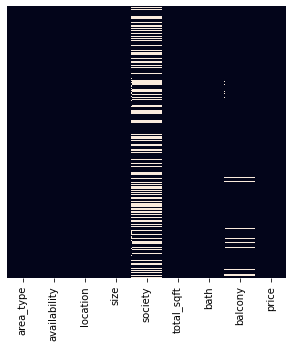

In [579]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

## Dealing with the missing values

In [580]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [581]:
df1['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Goyalir     1
Vanami      1
Amhidte     1
GaentAp     1
AuRISa      1
Name: society, Length: 2688, dtype: int64

In [582]:
df1['society'].describe()

count        7818
unique       2688
top       GrrvaGr
freq           80
Name: society, dtype: object

In [583]:
x=df1['society'].isnull().sum()
x

5502

In [584]:
y=df1['society'].count()
y=y-x
y

2316

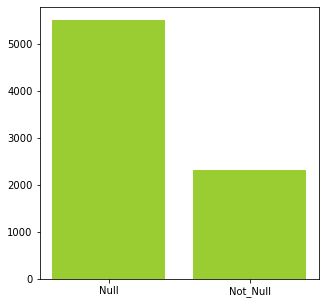

In [585]:
plot1=np.array([x,y])
plot2=np.array(["Null","Not_Null"])
plt.bar(plot2,plot1,color="yellowgreen")
plt.show()


####  society feature can be dropped

<AxesSubplot:xlabel='bath', ylabel='count'>

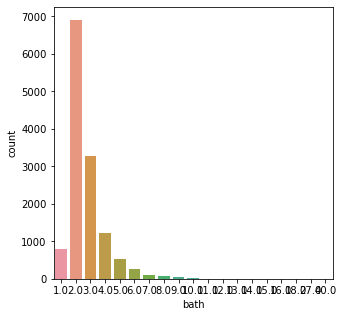

In [586]:
sns.countplot(x=df1['bath'])

<AxesSubplot:xlabel='balcony', ylabel='count'>

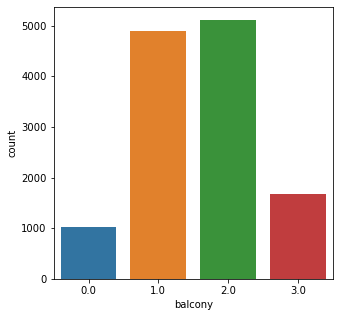

In [587]:
sns.countplot(x=df1['balcony'])

In [588]:
df1['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [589]:
df1['balcony'].isnull().sum()

609

In [590]:
df = df1.copy()
df1['size'].isnull().value_counts()

False    13304
True        16
Name: size, dtype: int64

In [591]:
df1['price'].value_counts()

75.00     310
65.00     302
55.00     275
60.00     270
45.00     240
         ... 
45.69       1
85.41       1
91.31       1
102.92      1
62.28       1
Name: price, Length: 1994, dtype: int64

<AxesSubplot:ylabel='Frequency'>

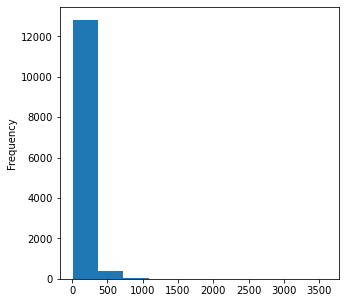

In [592]:
df1['price'].plot.hist()

In [593]:
df1.corr()["price"].sort_values(ascending=False)

price      1.000000
bath       0.456345
balcony    0.120355
Name: price, dtype: float64

#### balcony feature can be dropped 
#### assuming area_type and availability are not affecting prices much

## Removing unwanted columns

In [594]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [595]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [596]:
df2.shape

(13320, 5)

#### since the rows with null values are less as compared to total samples we consider removing the rows

<AxesSubplot:>

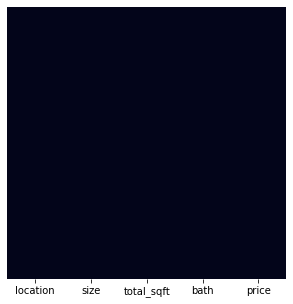

In [597]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False)

#### Null values removed

In [598]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Heatmap shows that there are no missing values

<AxesSubplot:>

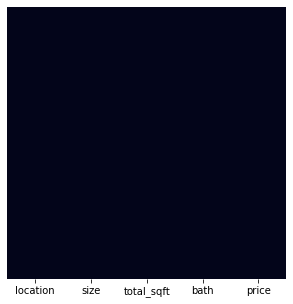

In [599]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False)

In [600]:
df3.shape

(13246, 5)

### Now we are left with 13246 samples and 5 features


## Finalizing our dataset

In [601]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

## Adding a feature bhk by extracting numerical part from  size

In [602]:
def function_to_get_numerical_part(x):
    return int(x.split(' ')[0])

In [603]:
df3['bhk']=df3['size'].apply(function_to_get_numerical_part)

In [604]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [605]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

<AxesSubplot:xlabel='bhk', ylabel='count'>

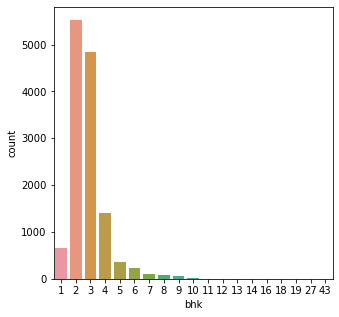

In [606]:
sns.countplot(x=df3['bhk'])

In [607]:
df3[df3.bhk>20].value_counts()

location                   size        total_sqft  bath  price  bhk
2Electronic City Phase II  27 BHK      8000        27.0  230.0  27     1
Munnekollal                43 Bedroom  2400        40.0  660.0  43     1
dtype: int64

In [608]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

## Converting range into numerical data if present

In [609]:
def checking_if_totalsqft_is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(checking_if_totalsqft_is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [610]:
def conversion_of_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [611]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(conversion_of_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


<AxesSubplot:ylabel='Frequency'>

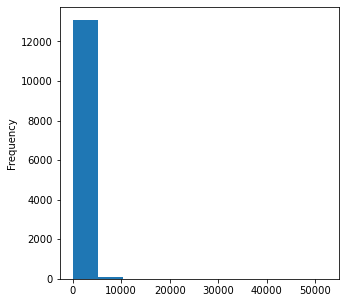

In [612]:
df4['total_sqft'].plot.hist()

### Addition of new feature sqft_price  and sqft_per_bhk for outlier analysis

In [613]:
df5=df4.copy()
df5['sqft_price']=df5['price']*100000/df5['total_sqft']
df5["sqft_per_bhk"] = df5['total_sqft'] /df5['bhk']
df5.head()

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.0


<AxesSubplot:ylabel='Frequency'>

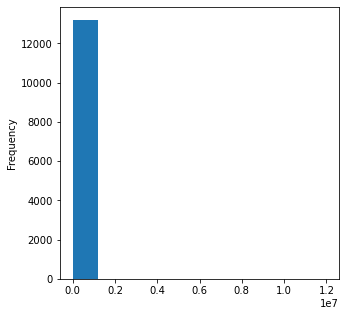

In [614]:
df5['sqft_price'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

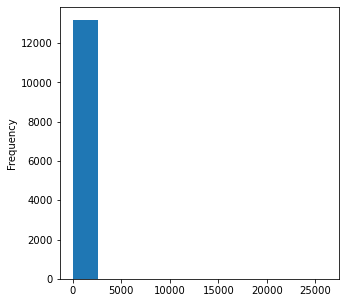

In [615]:
df5['sqft_per_bhk'].plot.hist()

## DIMENSIONALITY REDUCTION

In [616]:
len(df5.location.unique())

1304

In [617]:
df5['location'].dtype      # o means object

dtype('O')

## Relabelled few locations as other whose count was less than 10 as more location_count will increase number of columns in dataset

In [618]:
df5.location = df5.location.apply(lambda x: x.strip())
location_count = df5['location'].value_counts(ascending=False)
location_count

Whitefield                          535
Sarjapur  Road                      392
Electronic City                     304
Kanakpura Road                      266
Thanisandra                         236
                                   ... 
Housing Board Layout Vijay Nagar      1
Rainbow Drive                         1
Subhash Nagar                         1
Anathanagar                           1
Lalbagh Road                          1
Name: location, Length: 1293, dtype: int64

In [619]:
len(location_count[location_count<=10])

1052

In [620]:
location_count_is_less=location_count[location_count<=10]
location_count_is_less

Sector 1 HSR Layout                 10
1st Block Koramangala               10
Gunjur Palya                        10
Kalkere                             10
Nagadevanahalli                     10
                                    ..
Housing Board Layout Vijay Nagar     1
Rainbow Drive                        1
Subhash Nagar                        1
Anathanagar                          1
Lalbagh Road                         1
Name: location, Length: 1052, dtype: int64

In [621]:
len(df5.location.unique())

1293

In [622]:
def check_count(x):
    if x in location_count_is_less:
        return 'other'
    else:
        return x

In [623]:
df5.location=df5.location.apply(check_count)

In [624]:
len(df5.location.unique())

242

In [625]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,528.000000
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,650.000000
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,480.000000
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,507.000000
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,600.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248,585.000000
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101,683.000000
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182,825.000000
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275,436.666667
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804,170.000000


## OUTLIER DETECTION AND REMOVAL

In [626]:
df5['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [627]:
df5[df5['sqft_per_bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804,170.000000
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333,75.000000
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810,234.500000
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296,168.750000
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000,166.666667


In [628]:
df5.shape

(13246, 8)

In [629]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

<AxesSubplot:xlabel='sqft_per_bhk', ylabel='Density'>

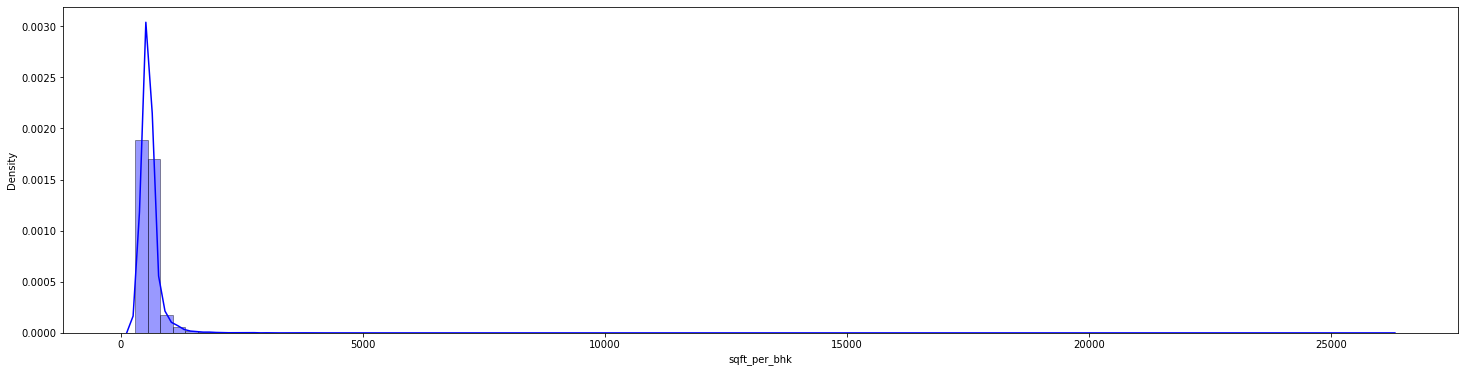

In [630]:
plt.rcParams['figure.figsize'] = 25,6
sns.distplot(df6['sqft_per_bhk'], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [631]:
df6.sqft_price.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: sqft_price, dtype: float64

<AxesSubplot:xlabel='sqft_price'>

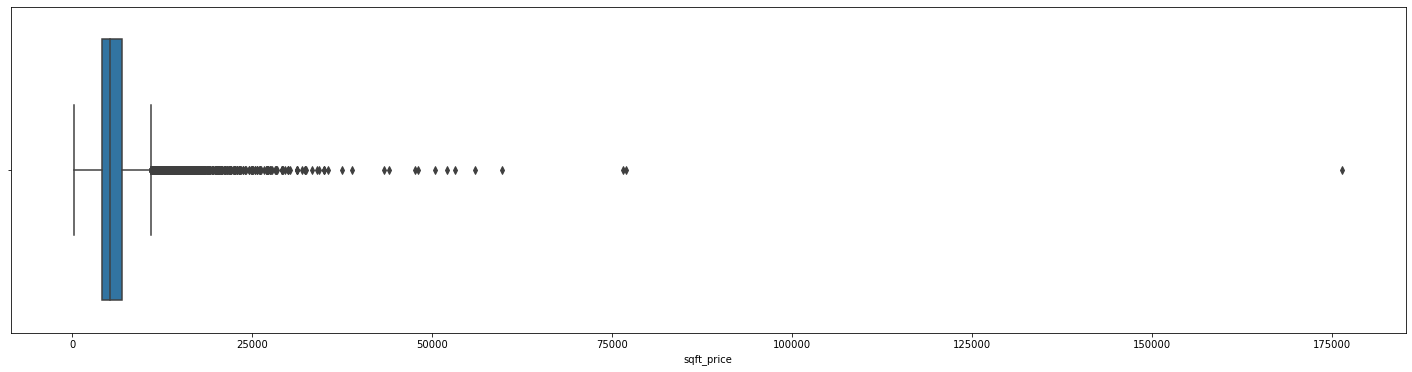

In [632]:
sns.boxplot("sqft_price",data=df6)

In [633]:
def remove(data):
    df=pd.DataFrame()
    for key,val in data.groupby('location'):
        m=np.mean(val.sqft_price)
        st=np.std(val.sqft_price)
        check=(m-st)
        checkd=(m+st)
        df_r=val[(val.sqft_price>check) & (val.sqft_price<=checkd)]
        df=pd.concat([df,df_r],ignore_index=True)
    return df
df7=remove(df6)
df7.shape

(10241, 8)

(array([1.086e+03, 5.734e+03, 2.470e+03, 4.960e+02, 2.630e+02, 1.260e+02,
        3.900e+01, 1.700e+01, 5.000e+00, 5.000e+00]),
 array([ 1250.        ,  3575.98039216,  5901.96078431,  8227.94117647,
        10553.92156863, 12879.90196078, 15205.88235294, 17531.8627451 ,
        19857.84313725, 22183.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

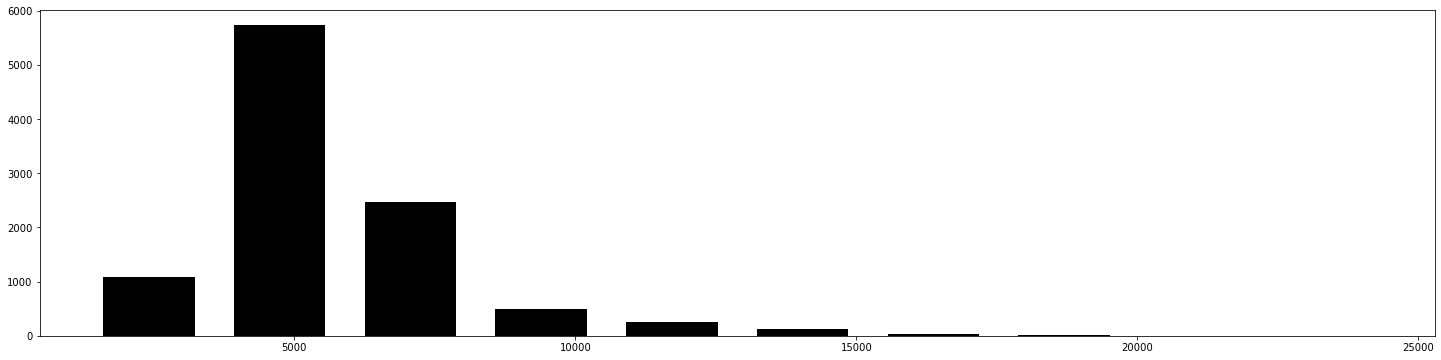

In [634]:
plt.hist(df7.sqft_price,rwidth=0.7,color='black')

<AxesSubplot:xlabel='bhk'>

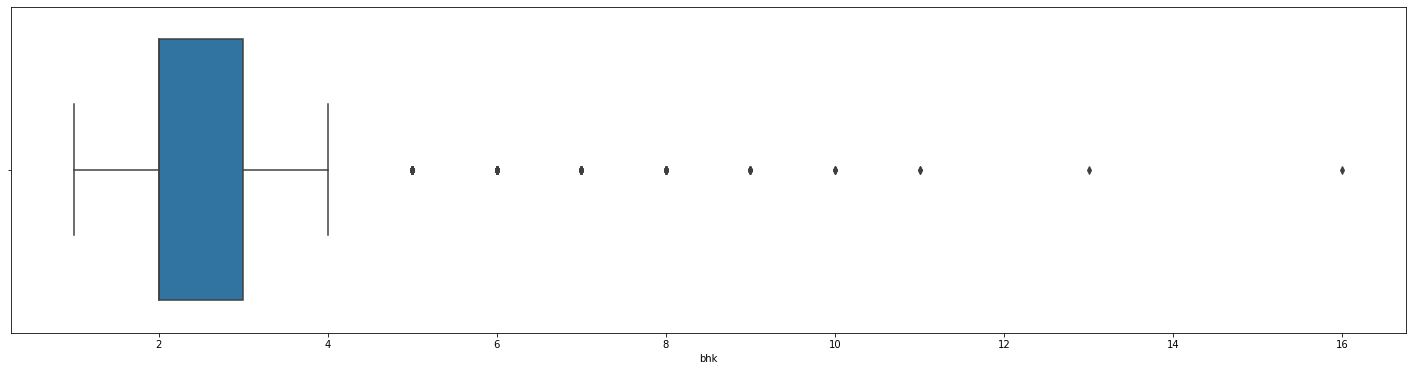

In [635]:
sns.boxplot("bhk",data=df7)

In [636]:
def removal(data):
    extra= np.array([])
    for location,lval in data.groupby('location'):
        print(location)
        print(lval)
        cnt_bhk= {}
        for bhk,bval in lval.groupby('bhk'):
            print(bhk)
            print(bval)
            cnt_bhk[bhk] ={'mean': np.mean(bval.sqft_price),'std': np.std(bval.sqft_price),'count': bval.shape[0]}
        print('Dictionary storing bhk along with its features')
        print(cnt_bhk)
        for bhk,bval in lval.groupby('bhk'):
            counts= cnt_bhk.get(bhk-1)
            print('Information of previous bhk size less than current bhk')
            print(counts)
            if counts and counts['count']>5:
                extra= np.append(extra, bval[bval.sqft_price<(counts['mean'])].index.values)
                print('Anomalies')
                print(extra)
    return data.drop(extra,axis='index')
df8= removal(df7)
df8.shape

1st Block Jayanagar
              location   size  total_sqft  bath  price  bhk    sqft_price  \
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4  15017.543860   
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3  11901.840491   
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3  12533.333333   
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3  10833.333333   
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2  11983.805668   
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4  15018.181818   
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4  15020.408163   

   sqft_per_bhk  
0    712.500000  
1    543.333333  
2    625.000000  
3    400.000000  
4    617.500000  
5    687.500000  
6    612.500000  
2
              location   size  total_sqft  bath  price  bhk    sqft_price  \
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2  11983.805668   

   sqft_per_bhk  
4         617.5  
3
              location  

1
               location       size  total_sqft  bath  price  bhk   sqft_price  \
182  7th Phase JP Nagar      1 BHK       750.0   1.0   47.0    1  6266.666667   
184  7th Phase JP Nagar  1 Bedroom      1000.0   1.0   60.0    1  6000.000000   

     sqft_per_bhk  
182         750.0  
184        1000.0  
2
               location   size  total_sqft  bath   price  bhk   sqft_price  \
90   7th Phase JP Nagar  2 BHK      1080.0   2.0   72.00    2  6666.666667   
91   7th Phase JP Nagar  2 BHK      1270.0   2.0   93.00    2  7322.834646   
94   7th Phase JP Nagar  2 BHK      1245.0   2.0   94.00    2  7550.200803   
95   7th Phase JP Nagar  2 BHK      1175.0   2.0   82.00    2  6978.723404   
98   7th Phase JP Nagar  2 BHK      1050.0   2.0   71.00    2  6761.904762   
99   7th Phase JP Nagar  2 BHK      1100.0   2.0   46.00    2  4181.818182   
100  7th Phase JP Nagar  2 BHK       918.0   2.0   50.49    2  5500.000000   
102  7th Phase JP Nagar  2 BHK      1190.0   2.0   49.98    2  4200.

364    599.000000  
1
       location   size  total_sqft  bath  price  bhk   sqft_price  \
359  Ambalipura  1 BHK       770.0   1.0  43.82    1  5690.909091   

     sqft_per_bhk  
359         770.0  
2
       location   size  total_sqft  bath  price  bhk   sqft_price  \
345  Ambalipura  2 BHK      1105.0   2.0  75.00    2  6787.330317   
347  Ambalipura  2 BHK      1150.0   2.0  80.00    2  6956.521739   
348  Ambalipura  2 BHK      1250.0   2.0  66.25    2  5300.000000   
349  Ambalipura  2 BHK      1332.0   2.0  79.00    2  5930.930931   
352  Ambalipura  2 BHK      1230.0   2.0  66.25    2  5386.178862   
353  Ambalipura  2 BHK      1351.0   2.0  77.00    2  5699.481865   
357  Ambalipura  2 BHK      1303.0   2.0  80.00    2  6139.677667   
360  Ambalipura  2 BHK      1700.0   2.0  76.00    2  4470.588235   
361  Ambalipura  2 BHK      1060.0   2.0  58.50    2  5518.867925   
364  Ambalipura  2 BHK      1198.0   2.0  80.00    2  6677.796327   

     sqft_per_bhk  
345         552.5

Anjanapura
       location       size  total_sqft  bath   price  bhk   sqft_price  \
490  Anjanapura      4 BHK      1850.0   4.0   86.00    4  4648.648649   
491  Anjanapura      2 BHK      1070.0   2.0   39.00    2  3644.859813   
492  Anjanapura  3 Bedroom      1500.0   3.0  121.00    3  8066.666667   
493  Anjanapura      2 BHK      1070.0   2.0   37.00    2  3457.943925   
494  Anjanapura      2 BHK       950.0   2.0   40.00    2  4210.526316   
495  Anjanapura      3 BHK      1280.0   2.0   45.00    3  3515.625000   
496  Anjanapura      2 BHK       710.0   2.0   25.00    2  3521.126761   
497  Anjanapura      3 BHK      1347.0   2.0   37.72    3  2800.296956   
498  Anjanapura      2 BHK       950.0   2.0   32.00    2  3368.421053   
499  Anjanapura      4 BHK      1800.0   4.0   55.00    4  3055.555556   
500  Anjanapura      3 BHK      1843.0   3.0   87.54    3  4749.864352   
501  Anjanapura      2 BHK      1076.0   2.0   30.13    2  2800.185874   
502  Anjanapura      2 BHK 

633    404.333333  
Dictionary storing bhk along with its features
{2: {'mean': 3799.9594889549185, 'std': 423.8304869618115, 'count': 11}, 3: {'mean': 3669.941030877054, 'std': 601.932707346431, 'count': 10}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 3799.9594889549185, 'std': 423.8304869618115, 'count': 11}
Anomalies
[ 11.   7.  23.  25.  54.  63.  64.  65.  74. 107. 108. 109. 115. 116.
 123. 124. 130. 133. 150. 167. 173. 181. 185. 112. 193. 195. 204. 217.
 220. 222. 232. 233. 235. 237. 239. 261. 263. 266. 268. 264. 278. 286.
 305. 318. 325. 331. 351. 355. 354. 356. 398. 399. 400. 414. 422. 430.
 448. 457. 464. 468. 469. 470. 476. 477. 480. 481. 483. 484. 485. 497.
 512. 551. 552. 553. 555. 562. 543. 570. 573. 577. 578. 585. 602. 617.
 618. 620. 624. 627. 633.]
Badavala Nagar
           location   size  total_sqft  bath   price  bhk   sqft_price  \
638  Badavala Nagar  3 BHK      1494.0   2.0   94.55   

1
      location  size  total_sqft  bath  price  bhk   sqft_price  sqft_per_bhk
805  Banaswadi  1 RK       527.0   1.0   35.0    1  6641.366224         527.0
2
      location   size  total_sqft  bath  price  bhk   sqft_price  sqft_per_bhk
796  Banaswadi  2 BHK      1184.0   2.0   53.0    2  4476.351351         592.0
797  Banaswadi  2 BHK      1145.0   2.0   55.0    2  4803.493450         572.5
798  Banaswadi  2 BHK      1250.0   2.0   60.0    2  4800.000000         625.0
799  Banaswadi  2 BHK      1365.0   2.0   73.0    2  5347.985348         682.5
801  Banaswadi  2 BHK      1222.0   2.0   80.0    2  6546.644845         611.0
802  Banaswadi  2 BHK       870.0   2.0   38.0    2  4367.816092         435.0
803  Banaswadi  2 BHK      1200.0   2.0   60.0    2  5000.000000         600.0
806  Banaswadi  2 BHK      1340.0   2.0   73.0    2  5447.761194         670.0
807  Banaswadi  2 BHK      1008.0   2.0   52.0    2  5158.730159         504.0
808  Banaswadi  2 BHK      1105.0   2.0   57.0    

1009    674.666667  
Dictionary storing bhk along with its features
{2: {'mean': 4345.724306884857, 'std': 823.6340914029164, 'count': 9}, 3: {'mean': 5015.40017552159, 'std': 337.7428143761158, 'count': 8}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 4345.724306884857, 'std': 823.6340914029164, 'count': 9}
Anomalies
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684

Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 5417.416718889453, 'std': 285.36806332317167, 'count': 12}
Anomalies
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  92

          location       size  total_sqft  bath  price  bhk   sqft_price  \
1361  Bommenahalli  4 Bedroom      1632.0   3.0  145.0    4  8884.803922   
1362  Bommenahalli  4 Bedroom      1670.0   3.0  135.0    4  8083.832335   
1363  Bommenahalli  4 Bedroom      1680.0   3.0  135.0    4  8035.714286   
1364  Bommenahalli  4 Bedroom      1632.0   3.0  128.0    4  7843.137255   
1366  Bommenahalli  4 Bedroom      1355.0   3.0  135.0    4  9963.099631   
1368  Bommenahalli  4 Bedroom      1632.0   3.0  140.0    4  8578.431373   

      sqft_per_bhk  
1361        408.00  
1362        417.50  
1363        420.00  
1364        408.00  
1366        338.75  
1368        408.00  
Dictionary storing bhk along with its features
{3: {'mean': 8565.382032363164, 'std': 1314.9620051314946, 'count': 3}, 4: {'mean': 8564.836466843257, 'std': 717.6221010374835, 'count': 6}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 8565.38

Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 3613.5088756107502, 'std': 502.5086800433043, 'count': 24}
Anomalies
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  92

1720         708.0  
2
        location   size  total_sqft  bath  price  bhk   sqft_price  \
1712  Dasanapura  2 BHK       708.0   2.0  37.00    2  5225.988701   
1713  Dasanapura  2 BHK       708.0   1.0  40.00    2  5649.717514   
1714  Dasanapura  2 BHK       965.0   2.0  42.50    2  4404.145078   
1716  Dasanapura  2 BHK       814.0   2.0  42.00    2  5159.705160   
1717  Dasanapura  2 BHK      1163.0   2.0  65.00    2  5588.993981   
1719  Dasanapura  2 BHK       708.0   2.0  31.15    2  4399.717514   
1721  Dasanapura  2 BHK       814.0   2.0  43.70    2  5368.550369   

      sqft_per_bhk  
1712         354.0  
1713         354.0  
1714         482.5  
1716         407.0  
1717         581.5  
1719         354.0  
1721         407.0  
3
        location   size  total_sqft  bath  price  bhk   sqft_price  \
1715  Dasanapura  3 BHK      1286.0   3.0  61.44    3  4777.604977   
1718  Dasanapura  3 BHK      1286.0   2.0  68.00    3  5287.713841   

      sqft_per_bhk  
1715    428.66

 1811. 1812. 1813. 1814. 1825. 1835.]
Domlur
     location   size  total_sqft  bath  price  bhk    sqft_price  sqft_per_bhk
1844   Domlur  3 BHK      1540.0   3.0   90.0    3   5844.155844    513.333333
1845   Domlur  3 BHK      1875.0   2.0  150.0    3   8000.000000    625.000000
1846   Domlur  3 BHK      1429.0   3.0   86.0    3   6018.194542    476.333333
1847   Domlur  1 BHK       640.0   1.0   55.0    1   8593.750000    640.000000
1848   Domlur  2 BHK      1050.0   2.0   85.0    2   8095.238095    525.000000
1849   Domlur  3 BHK      1800.0   3.0  150.0    3   8333.333333    600.000000
1850   Domlur  3 BHK      1720.0   3.0  135.0    3   7848.837209    573.333333
1851   Domlur  3 BHK      1950.0   3.0  165.0    3   8461.538462    650.000000
1852   Domlur  3 BHK      2180.0   3.0  285.0    3  13073.394495    726.666667
1853   Domlur  1 BHK       650.0   1.0   70.0    1  10769.230769    650.000000
1854   Domlur  1 BHK       780.0   1.0   70.0    1   8974.358974    780.000000
1855   

[71 rows x 8 columns]
3
                      location   size  total_sqft  bath   price  bhk  \
2177  Electronic City Phase II  3 BHK      1220.0   2.0   35.23    3   
2181  Electronic City Phase II  3 BHK      1400.0   2.0   40.43    3   
2185  Electronic City Phase II  3 BHK      1320.0   2.0   38.13    3   
2186  Electronic City Phase II  3 BHK      1220.0   3.0   35.23    3   
2188  Electronic City Phase II  3 BHK      1400.0   2.0   40.43    3   
2192  Electronic City Phase II  3 BHK      1320.0   2.0   38.12    3   
2193  Electronic City Phase II  3 BHK      1395.0   2.0   62.78    3   
2197  Electronic City Phase II  3 BHK      1400.0   2.0   41.58    3   
2199  Electronic City Phase II  3 BHK      1790.0   3.0  100.00    3   
2201  Electronic City Phase II  3 BHK      1400.0   2.0   40.43    3   
2203  Electronic City Phase II  3 BHK      1329.0   2.0   41.00    3   
2204  Electronic City Phase II  3 BHK      1220.0   3.0   35.23    3   
2205  Electronic City Phase II  3 BHK   

2456         600.0  
3
       location   size  total_sqft  bath  price  bhk   sqft_price  \
2422  Gottigere  3 BHK      1618.0   3.0   82.5    3  5098.887515   
2424  Gottigere  3 BHK      1600.0   2.0   55.0    3  3437.500000   
2425  Gottigere  3 BHK      1300.0   3.0   65.0    3  5000.000000   
2430  Gottigere  3 BHK      1460.0   2.0   65.0    3  4452.054795   
2431  Gottigere  3 BHK      1500.0   3.0   70.0    3  4666.666667   
2432  Gottigere  3 BHK      1621.0   3.0   72.0    3  4441.702653   
2436  Gottigere  3 BHK      1385.0   3.0   64.0    3  4620.938628   
2439  Gottigere  3 BHK      1385.0   2.0   50.0    3  3610.108303   
2440  Gottigere  3 BHK      1425.0   2.0   47.0    3  3298.245614   
2441  Gottigere  3 BHK      1435.0   2.0   62.0    3  4320.557491   
2443  Gottigere  3 BHK      1400.0   2.0   50.0    3  3571.428571   
2445  Gottigere  3 BHK      1230.0   2.0   52.0    3  4227.642276   
2447  Gottigere  3 BHK      1500.0   3.0   63.0    3  4200.000000   
2453  Gotti

2594    570.000000  
2
        location   size  total_sqft  bath  price  bhk   sqft_price  \
2552  HSR Layout  2 BHK      1372.0   2.0   68.0    2  4956.268222   
2555  HSR Layout  2 BHK      1467.0   2.0   55.0    2  3749.147921   
2556  HSR Layout  2 BHK      1140.0   2.0   46.0    2  4035.087719   
2557  HSR Layout  2 BHK      1372.0   2.0   61.0    2  4446.064140   
2560  HSR Layout  2 BHK      1027.0   2.0   44.0    2  4284.323272   
2562  HSR Layout  2 BHK      1140.0   2.0   46.0    2  4035.087719   
2563  HSR Layout  2 BHK      1372.0   2.0   61.0    2  4446.064140   
2564  HSR Layout  2 BHK      1140.0   2.0   46.0    2  4035.087719   
2565  HSR Layout  2 BHK      1185.0   2.0   60.0    2  5063.291139   
2566  HSR Layout  2 BHK      1127.0   2.0   68.0    2  6033.717835   
2568  HSR Layout  2 BHK      1145.0   2.0   48.0    2  4192.139738   
2569  HSR Layout  2 BHK      1009.0   2.0   56.0    2  5550.049554   
2570  HSR Layout  2 BHK      1300.0   2.0   98.0    2  7538.461538 

2980    449.333333  
4
         location       size  total_sqft  bath  price  bhk   sqft_price  \
2954  Hegde Nagar  4 Bedroom      1200.0   4.0   83.0    4  6916.666667   

      sqft_per_bhk  
2954         300.0  
6
         location       size  total_sqft  bath  price  bhk  sqft_price  \
2948  Hegde Nagar  6 Bedroom      3000.0   7.0  210.0    6      7000.0   

      sqft_per_bhk  
2948         500.0  
Dictionary storing bhk along with its features
{2: {'mean': 6157.975113248077, 'std': 728.8922268349711, 'count': 5}, 3: {'mean': 6681.438863622023, 'std': 564.0312879402329, 'count': 27}, 4: {'mean': 6916.666666666667, 'std': 0.0, 'count': 1}, 6: {'mean': 7000.0, 'std': 0.0, 'count': 1}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 6157.975113248077, 'std': 728.8922268349711, 'count': 5}
Information of previous bhk size less than current bhk
{'mean': 6681.438863622023, 'std': 564.0312879402329, 'count': 27

            location       size  total_sqft  bath  price  bhk   sqft_price  \
3209  Horamavu Agara      2 BHK     1200.00   2.0  45.00    2  3750.000000   
3210  Horamavu Agara      3 BHK     1560.00   3.0  75.00    3  4807.692308   
3211  Horamavu Agara      2 BHK      755.00   2.0  37.49    2  4965.562914   
3212  Horamavu Agara      2 BHK      982.00   2.0  47.65    2  4852.342159   
3213  Horamavu Agara      3 BHK     1650.00   2.0  75.00    3  4545.454545   
3214  Horamavu Agara      2 BHK      950.00   2.0  39.00    2  4105.263158   
3215  Horamavu Agara      3 BHK     1756.00   3.0  92.00    3  5239.179954   
3216  Horamavu Agara      2 BHK     1106.00   2.0  43.09    2  3896.021700   
3217  Horamavu Agara      2 BHK     1079.00   2.0  41.00    2  3799.814643   
3218  Horamavu Agara      3 BHK     1265.00   2.0  65.00    3  5138.339921   
3219  Horamavu Agara      2 BHK     1060.00   2.0  37.00    2  3490.566038   
3220  Horamavu Agara      2 BHK     1107.83   2.0  41.51    2  3

     location       size  total_sqft  bath   price  bhk   sqft_price  \
3375  Hoskote      3 BHK      1250.0   3.0  50.000    3  4000.000000   
3376  Hoskote      3 BHK      1225.0   3.0  40.000    3  3265.306122   
3377  Hoskote      3 BHK      1740.0   3.0  60.000    3  3448.275862   
3378  Hoskote      2 BHK      1170.0   2.0  45.000    2  3846.153846   
3379  Hoskote      3 BHK      1250.0   3.0  29.000    3  2320.000000   
3380  Hoskote  3 Bedroom      1200.0   3.0  57.000    3  4750.000000   
3381  Hoskote      3 BHK      1069.0   2.0  38.000    3  3554.724041   
3382  Hoskote      2 BHK      1095.0   2.0  33.600    2  3068.493151   
3383  Hoskote      3 BHK      1695.0   3.0  50.000    3  2949.852507   
3384  Hoskote      2 BHK      1065.0   2.0  31.500    2  2957.746479   
3385  Hoskote      3 BHK      1395.0   2.0  63.000    3  4516.129032   
3386  Hoskote      2 BHK      1065.0   2.0  28.500    2  2676.056338   
3387  Hoskote      2 BHK       945.0   2.0  35.000    2  3703.70

Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 7091.009765176507, 'std': 410.88523168233667, 'count': 11}
Anomalies
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  92

3674    468.333333  
4
       location       size  total_sqft  bath  price  bhk  sqft_price  \
3649  Jalahalli  4 Bedroom      1200.0   4.0   90.0    4      7500.0   

      sqft_per_bhk  
3649         300.0  
Dictionary storing bhk along with its features
{1: {'mean': 6656.504065040651, 'std': 856.2509031207591, 'count': 4}, 2: {'mean': 6419.206421173111, 'std': 837.6548293126691, 'count': 12}, 3: {'mean': 6351.724037140902, 'std': 708.5723247593588, 'count': 19}, 4: {'mean': 7500.0, 'std': 0.0, 'count': 1}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 6656.504065040651, 'std': 856.2509031207591, 'count': 4}
Information of previous bhk size less than current bhk
{'mean': 6419.206421173111, 'std': 837.6548293126691, 'count': 12}
Anomalies
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  

3842    598.000000  
1
      location   size  total_sqft  bath  price  bhk  sqft_price  sqft_per_bhk
3826  Kadugodi  1 BHK       925.0   1.0   40.7    1      4400.0         925.0
2
      location   size  total_sqft  bath  price  bhk   sqft_price  sqft_per_bhk
3813  Kadugodi  2 BHK      1198.0   2.0   58.0    2  4841.402337         599.0
3819  Kadugodi  2 BHK      1314.0   2.0   68.2    2  5190.258752         657.0
3821  Kadugodi  2 BHK      1100.0   2.0   45.0    2  4090.909091         550.0
3823  Kadugodi  2 BHK      1314.0   2.0   78.0    2  5936.073059         657.0
3825  Kadugodi  2 BHK      1314.0   2.0   83.0    2  6316.590563         657.0
3828  Kadugodi  2 BHK      1010.0   2.0   50.0    2  4950.495050         505.0
3830  Kadugodi  2 BHK      1152.0   2.0   61.0    2  5295.138889         576.0
3831  Kadugodi  2 BHK      1394.0   2.0   56.0    2  4017.216643         697.0
3837  Kadugodi  2 BHK      1088.0   2.0   44.0    2  4044.117647         544.0
3839  Kadugodi  2 BHK      11

[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 1070. 10

4233    478.500000  
2
          location   size  total_sqft  bath  price  bhk   sqft_price  \
4222  Kannamangala  2 BHK       957.0   2.0   58.0    2  6060.606061   
4223  Kannamangala  2 BHK       957.0   2.0   56.0    2  5851.619645   
4228  Kannamangala  2 BHK       957.0   2.0   52.5    2  5485.893417   
4230  Kannamangala  2 BHK       957.0   2.0   54.5    2  5694.879833   
4232  Kannamangala  2 BHK       957.0   2.0   55.0    2  5747.126437   
4233  Kannamangala  2 BHK       957.0   2.0   56.0    2  5851.619645   

      sqft_per_bhk  
4222         478.5  
4223         478.5  
4228         478.5  
4230         478.5  
4232         478.5  
4233         478.5  
3
          location   size  total_sqft  bath   price  bhk   sqft_price  \
4225  Kannamangala  3 BHK      1536.0   3.0   89.00    3  5794.270833   
4227  Kannamangala  3 BHK      1574.0   3.0   93.34    3  5930.114358   
4229  Kannamangala  3 BHK      1536.0   3.0  104.00    3  6770.833333   

      sqft_per_bhk  
4225    5

 4302. 4272. 4312. 4313. 4316. 4362.]
Kengeri
     location       size  total_sqft  bath   price  bhk   sqft_price  \
4370  Kengeri      3 BHK      1540.0   2.0   64.00    3  4155.844156   
4371  Kengeri      2 BHK       750.0   2.0   38.00    2  5066.666667   
4372  Kengeri      2 BHK      1160.0   2.0   40.61    2  3500.862069   
4373  Kengeri      2 BHK      1197.0   2.0   50.00    2  4177.109440   
4374  Kengeri      2 BHK      1200.0   2.0   58.00    2  4833.333333   
4375  Kengeri      3 BHK      1188.0   2.0   38.00    3  3198.653199   
4376  Kengeri      2 BHK       726.0   2.0   31.00    2  4269.972452   
4377  Kengeri      3 BHK      1250.0   3.0   48.00    3  3840.000000   
4378  Kengeri      2 BHK      1025.0   2.0   57.00    2  5560.975610   
4379  Kengeri      3 BHK      1160.0   2.0   40.60    3  3500.000000   
4380  Kengeri      3 BHK      1082.0   2.0   49.00    3  4528.650647   
4381  Kengeri      2 BHK      1155.0   2.0   40.60    2  3515.151515   
4382  Kengeri     

4496         317.5  
3
         location       size  total_sqft  bath  price  bhk    sqft_price  \
4495  Kodigehalli      3 BHK      1820.0   3.0  150.0    3   8241.758242   
4497  Kodigehalli  3 Bedroom      1200.0   4.0  156.0    3  13000.000000   

      sqft_per_bhk  
4495    606.666667  
4497    400.000000  
Dictionary storing bhk along with its features
{1: {'mean': 8091.603053435115, 'std': 0.0, 'count': 1}, 2: {'mean': 5375.328083989501, 'std': 1663.9012335209106, 'count': 3}, 3: {'mean': 10620.87912087912, 'std': 2379.120879120879, 'count': 2}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 8091.603053435115, 'std': 0.0, 'count': 1}
Information of previous bhk size less than current bhk
{'mean': 5375.328083989501, 'std': 1663.9012335209106, 'count': 3}
Kodihalli
       location   size  total_sqft  bath  price  bhk    sqft_price  \
4498  Kodihalli  4 BHK      3252.0   5.0  335.0    4  10301.353014   
4

Information of previous bhk size less than current bhk
{'mean': 4854.565077877619, 'std': 214.79334119523998, 'count': 25}
Anomalies
[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  86

4787         600.0  
3
     location       size  total_sqft  bath  price  bhk    sqft_price  \
4785  Laggere  3 Bedroom      1200.0   3.0  130.0    3  10833.333333   

      sqft_per_bhk  
4785         400.0  
5
     location       size  total_sqft  bath  price  bhk   sqft_price  \
4784  Laggere  5 Bedroom      2800.0   5.0  125.0    5  4464.285714   

      sqft_per_bhk  
4784         560.0  
Dictionary storing bhk along with its features
{1: {'mean': 9079.301075268817, 'std': 1337.3655913978491, 'count': 2}, 2: {'mean': 6250.0, 'std': 0.0, 'count': 1}, 3: {'mean': 10833.333333333334, 'std': 0.0, 'count': 1}, 5: {'mean': 4464.285714285715, 'std': 0.0, 'count': 1}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 9079.301075268817, 'std': 1337.3655913978491, 'count': 2}
Information of previous bhk size less than current bhk
{'mean': 6250.0, 'std': 0.0, 'count': 1}
Information of previous bhk size less than curre

         location   size  total_sqft  bath  price  bhk   sqft_price  \
4849  Mahadevpura  2 BHK      1150.0   2.0   52.0    2  4521.739130   
4850  Mahadevpura  2 BHK      1250.0   2.0   52.0    2  4160.000000   
4851  Mahadevpura  2 BHK      1260.0   2.0   57.6    2  4571.428571   
4854  Mahadevpura  2 BHK      1146.0   2.0   53.8    2  4694.589878   
4855  Mahadevpura  2 BHK      1532.0   2.0   62.0    2  4046.997389   
4857  Mahadevpura  2 BHK      1136.0   2.0   64.5    2  5677.816901   
4859  Mahadevpura  2 BHK      1137.0   2.0   53.4    2  4696.569921   
4862  Mahadevpura  2 BHK      1152.0   2.0   54.0    2  4687.500000   
4863  Mahadevpura  2 BHK      1212.0   2.0   56.9    2  4694.719472   
4867  Mahadevpura  2 BHK      1236.0   2.0   58.0    2  4692.556634   
4868  Mahadevpura  2 BHK      1236.0   2.0   58.0    2  4692.556634   
4869  Mahadevpura  2 BHK      1120.0   2.0   53.0    2  4732.142857   

      sqft_per_bhk  
4849         575.0  
4850         625.0  
4851         

[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 1070. 10

 5231.]
Information of previous bhk size less than current bhk
{'mean': 12000.0, 'std': 2000.0, 'count': 2}
Nagasandra
        location       size  total_sqft  bath  price  bhk   sqft_price  \
5236  Nagasandra      2 BHK       980.0   2.0   48.0    2  4897.959184   
5237  Nagasandra      4 BHK      2400.0   4.0  145.0    4  6041.666667   
5238  Nagasandra  4 Bedroom      7000.0   8.0  450.0    4  6428.571429   
5239  Nagasandra      3 BHK      1650.0   3.0   95.0    3  5757.575758   
5240  Nagasandra  2 Bedroom      1500.0   2.0   91.0    2  6066.666667   

      sqft_per_bhk  
5236         490.0  
5237         600.0  
5238        1750.0  
5239         550.0  
5240         750.0  
2
        location       size  total_sqft  bath  price  bhk   sqft_price  \
5236  Nagasandra      2 BHK       980.0   2.0   48.0    2  4897.959184   
5240  Nagasandra  2 Bedroom      1500.0   2.0   91.0    2  6066.666667   

      sqft_per_bhk  
5236         490.0  
5240         750.0  
3
        location   s

[  11.    7.   23.   25.   54.   63.   64.   65.   74.  107.  108.  109.
  115.  116.  123.  124.  130.  133.  150.  167.  173.  181.  185.  112.
  193.  195.  204.  217.  220.  222.  232.  233.  235.  237.  239.  261.
  263.  266.  268.  264.  278.  286.  305.  318.  325.  331.  351.  355.
  354.  356.  398.  399.  400.  414.  422.  430.  448.  457.  464.  468.
  469.  470.  476.  477.  480.  481.  483.  484.  485.  497.  512.  551.
  552.  553.  555.  562.  543.  570.  573.  577.  578.  585.  602.  617.
  618.  620.  624.  627.  633.  651.  652.  656.  661.  666.  667.  669.
  670.  681.  684.  690.  698.  712.  727.  732.  736.  737.  742.  696.
  762.  804.  830.  834.  840.  842.  846.  848.  852.  854.  859.  861.
  866.  869.  873.  875.  886.  888.  892.  893.  897.  899.  903.  912.
  921.  932.  935.  936.  940.  943.  944.  946.  949.  828.  864.  906.
  954.  836.  967.  968.  973.  976.  978.  979.  981.  983. 1006. 1011.
 1028. 1039. 1046. 1051. 1054. 1064. 1066. 1070. 10

      location   size  total_sqft  bath  price  bhk   sqft_price  sqft_per_bhk
5418  Panathur  3 BHK      1688.0   3.0  118.0    3  6990.521327    562.666667
5419  Panathur  3 BHK      1695.0   3.0   90.0    3  5309.734513    565.000000
5422  Panathur  3 BHK      1546.0   3.0   99.0    3  6403.622251    515.333333
5423  Panathur  3 BHK      1370.0   2.0   75.0    3  5474.452555    456.666667
5435  Panathur  3 BHK      1861.0   3.0   92.0    3  4943.578721    620.333333
Dictionary storing bhk along with its features
{1: {'mean': 6051.437216338881, 'std': 0.0, 'count': 1}, 2: {'mean': 6163.683079124272, 'std': 522.5629147973473, 'count': 24}, 3: {'mean': 5824.381873424201, 'std': 756.1120640080887, 'count': 5}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 6051.437216338881, 'std': 0.0, 'count': 1}
Information of previous bhk size less than current bhk
{'mean': 6163.683079124272, 'std': 522.5629147973473, 'coun

5794    546.666667  
4
          location       size  total_sqft  bath  price  bhk    sqft_price  \
5729  Rajaji Nagar      4 BHK      3516.0   4.0  540.0    4  15358.361775   
5731  Rajaji Nagar      4 BHK      3526.0   4.0  492.0    4  13953.488372   
5733  Rajaji Nagar      4 BHK      3526.0   4.0  558.0    4  15825.297788   
5739  Rajaji Nagar      4 BHK      3436.0   6.0  475.0    4  13824.214203   
5742  Rajaji Nagar      4 BHK      3436.0   6.0  500.0    4  14551.804424   
5750  Rajaji Nagar      4 BHK      2648.0   5.0  251.5    4   9497.734139   
5751  Rajaji Nagar      4 BHK      3730.0   4.0  370.0    4   9919.571046   
5753  Rajaji Nagar      4 BHK      3100.0   4.0  550.0    4  17741.935484   
5754  Rajaji Nagar      4 BHK      3526.0   4.0  598.0    4  16959.727737   
5774  Rajaji Nagar  4 Bedroom      2440.0   2.0  415.0    4  17008.196721   
5776  Rajaji Nagar      4 BHK      2733.0   5.0  259.0    4   9476.765459   
5781  Rajaji Nagar  4 Bedroom      1350.0   4.0  230.

          location   size  total_sqft  bath  price  bhk    sqft_price  \
5950  Sanjay nagar  2 BHK      1000.0   2.0   70.0    2   7000.000000   
5951  Sanjay nagar  2 BHK      1100.0   2.0   98.0    2   8909.090909   
5952  Sanjay nagar  2 BHK      1150.0   2.0   72.2    2   6278.260870   
5953  Sanjay nagar  3 BHK      1800.0   3.0  180.0    3  10000.000000   
5954  Sanjay nagar  2 BHK       630.0   1.0   35.0    2   5555.555556   
5955  Sanjay nagar  5 BHK      3300.0   3.0  250.0    5   7575.757576   
5956  Sanjay nagar  3 BHK      1900.0   2.0  180.0    3   9473.684211   
5957  Sanjay nagar  2 BHK      1575.0   2.0   90.0    2   5714.285714   
5958  Sanjay nagar  3 BHK      1450.0   3.0   75.0    3   5172.413793   
5959  Sanjay nagar  3 BHK      1200.0   2.0   76.0    3   6333.333333   
5960  Sanjay nagar  2 BHK       960.0   2.0   55.0    2   5729.166667   
5961  Sanjay nagar  2 BHK      1050.0   2.0   59.0    2   5619.047619   
5962  Sanjay nagar  2 BHK      1150.0   2.0   70.0 

6359         615.5  
3
                 location   size  total_sqft  bath  price  bhk   sqft_price  \
6355  Sector 2 HSR Layout  3 BHK      1665.0   3.0  110.0    3  6606.606607   
6356  Sector 2 HSR Layout  3 BHK      1512.0   3.0   80.0    3  5291.005291   
6358  Sector 2 HSR Layout  3 BHK      1600.0   3.0   90.0    3  5625.000000   

      sqft_per_bhk  
6355    555.000000  
6356    504.000000  
6358    533.333333  
Dictionary storing bhk along with its features
{1: {'mean': 7556.675062972292, 'std': 0.0, 'count': 1}, 2: {'mean': 6104.475872678937, 'std': 867.7629358050074, 'count': 4}, 3: {'mean': 5840.870632537299, 'std': 558.3617721495737, 'count': 3}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 7556.675062972292, 'std': 0.0, 'count': 1}
Information of previous bhk size less than current bhk
{'mean': 6104.475872678937, 'std': 867.7629358050074, 'count': 4}
Sector 7 HSR Layout
                 locatio

6486    600.000000  
2
            location   size  total_sqft  bath  price  bhk   sqft_price  \
6460  Subramanyapura  2 BHK       929.0   2.0  50.17    2  5400.430571   
6461  Subramanyapura  2 BHK      1200.0   2.0  52.00    2  4333.333333   
6462  Subramanyapura  2 BHK       975.0   2.0  58.00    2  5948.717949   
6463  Subramanyapura  2 BHK      1277.0   2.0  55.00    2  4306.969460   
6464  Subramanyapura  2 BHK       985.0   2.0  58.00    2  5888.324873   
6466  Subramanyapura  2 BHK      1313.0   2.0  73.00    2  5559.786748   
6467  Subramanyapura  2 BHK      1313.0   2.0  66.50    2  5064.737243   
6470  Subramanyapura  2 BHK       929.0   2.0  48.00    2  5166.846071   
6471  Subramanyapura  2 BHK       950.0   2.0  55.00    2  5789.473684   
6472  Subramanyapura  2 BHK       929.0   2.0  56.00    2  6027.987083   
6476  Subramanyapura  2 BHK       960.0   2.0  55.00    2  5729.166667   
6480  Subramanyapura  2 BHK       929.0   2.0  49.00    2  5274.488698   
6482  Subramany

1
              location       size  total_sqft  bath  price  bhk  sqft_price  \
6788  Thyagaraja Nagar  1 Bedroom       800.0   1.0  100.0    1     12500.0   

      sqft_per_bhk  
6788         800.0  
2
              location   size  total_sqft  bath  price  bhk   sqft_price  \
6791  Thyagaraja Nagar  2 BHK      1040.0   2.0   68.0    2  6538.461538   

      sqft_per_bhk  
6791         520.0  
3
              location   size  total_sqft  bath  price  bhk  sqft_price  \
6790  Thyagaraja Nagar  3 BHK      1270.0   2.0  95.25    3      7500.0   

      sqft_per_bhk  
6790    423.333333  
5
              location   size  total_sqft  bath  price  bhk  sqft_price  \
6789  Thyagaraja Nagar  5 BHK      2000.0   4.0  145.0    5      7250.0   

      sqft_per_bhk  
6789         400.0  
Dictionary storing bhk along with its features
{1: {'mean': 12500.0, 'std': 0.0, 'count': 1}, 2: {'mean': 6538.461538461538, 'std': 0.0, 'count': 1}, 3: {'mean': 7500.0, 'std': 0.0, 'count': 1}, 5: {'mean': 725

7056         425.0  
3
          location   size  total_sqft  bath  price  bhk   sqft_price  \
7050  Varthur Road  3 BHK      1247.0   2.0  58.00    3  4651.162791   
7053  Varthur Road  3 BHK      1033.0   2.0  30.47    3  2949.661181   

      sqft_per_bhk  
7050    415.666667  
7053    344.333333  
Dictionary storing bhk along with its features
{2: {'mean': 3754.9654055540996, 'std': 648.3927903937736, 'count': 7}, 3: {'mean': 3800.411985861906, 'std': 850.7508048357686, 'count': 2}}
Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 3754.9654055540996, 'std': 648.3927903937736, 'count': 7}
Anomalies
[1.100e+01 7.000e+00 2.300e+01 ... 7.045e+03 7.047e+03 7.053e+03]
Vasanthapura
          location   size  total_sqft  bath  price  bhk   sqft_price  \
7057  Vasanthapura  2 BHK      1022.0   2.0  40.00    2  3913.894325   
7058  Vasanthapura  2 BHK      1135.0   2.0  39.73    2  3500.440529   
7059  Vasanthapura  2

7166         623.0  
3
         location   size  total_sqft  bath  price  bhk   sqft_price  \
7137  Vittasandra  3 BHK      1743.0   3.0   85.0    3  4876.649455   
7149  Vittasandra  3 BHK      1650.0   3.0   84.0    3  5090.909091   
7152  Vittasandra  3 BHK      1650.0   3.0   85.0    3  5151.515152   
7157  Vittasandra  3 BHK      1650.0   3.0   85.5    3  5181.818182   
7159  Vittasandra  3 BHK      1650.0   3.0   85.0    3  5151.515152   
7160  Vittasandra  3 BHK      1650.0   3.0   85.5    3  5181.818182   
7167  Vittasandra  3 BHK      1648.0   3.0   85.0    3  5157.766990   

      sqft_per_bhk  
7137    581.000000  
7149    550.000000  
7152    550.000000  
7157    550.000000  
7159    550.000000  
7160    550.000000  
7167    549.333333  
Dictionary storing bhk along with its features
{2: {'mean': 5265.466588027837, 'std': 172.6857542886576, 'count': 31}, 3: {'mean': 5113.14174326139, 'std': 100.56430016629145, 'count': 7}}
Information of previous bhk size less than current 

Anomalies
[1.100e+01 7.000e+00 2.300e+01 ... 7.808e+03 7.789e+03 7.852e+03]
Information of previous bhk size less than current bhk
{'mean': 5255.289619148657, 'std': 1329.2576472001515, 'count': 7}
Anomalies
[1.100e+01 7.000e+00 2.300e+01 ... 7.853e+03 7.856e+03 7.859e+03]
Information of previous bhk size less than current bhk
{'mean': 5244.8328585493755, 'std': 1308.1039897883682, 'count': 12}
Anomalies
[1.100e+01 7.000e+00 2.300e+01 ... 7.856e+03 7.859e+03 7.842e+03]
Yelenahalli
         location   size  total_sqft  bath  price  bhk   sqft_price  \
7860  Yelenahalli  2 BHK      1240.0   2.0  47.12    2  3800.000000   
7861  Yelenahalli  2 BHK      1200.0   2.0  46.17    2  3847.500000   
7862  Yelenahalli  3 BHK      1600.0   3.0  61.37    3  3835.625000   
7863  Yelenahalli  2 BHK      1260.0   2.0  47.88    2  3800.000000   
7864  Yelenahalli  3 BHK      1500.0   2.0  57.00    3  3800.000000   
7865  Yelenahalli  2 BHK      1175.0   2.0  50.00    2  4255.319149   
7866  Yelenahalli

Information of previous bhk size less than current bhk
None
Information of previous bhk size less than current bhk
{'mean': 5321.358826419816, 'std': 2357.7059009960285, 'count': 132}
Anomalies
[1.1000e+01 7.0000e+00 2.3000e+01 ... 1.0234e+04 1.0235e+04 1.0239e+04]
Information of previous bhk size less than current bhk
{'mean': 5293.297542164921, 'std': 1980.8114615403324, 'count': 984}
Anomalies
[1.1000e+01 7.0000e+00 2.3000e+01 ... 1.0228e+04 1.0231e+04 1.0238e+04]
Information of previous bhk size less than current bhk
{'mean': 6303.178181413835, 'std': 2552.0634251169126, 'count': 858}
Anomalies
[1.1000e+01 7.0000e+00 2.3000e+01 ... 1.0129e+04 1.0167e+04 1.0192e+04]
Information of previous bhk size less than current bhk
{'mean': 8334.159251776742, 'std': 2892.9656869519777, 'count': 224}
Anomalies
[1.1000e+01 7.0000e+00 2.3000e+01 ... 1.0045e+04 1.0123e+04 1.0157e+04]
Information of previous bhk size less than current bhk
{'mean': 7187.851183160372, 'std': 3384.458343154111, 'count'

(7329, 8)

In [637]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [638]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000,400.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000,1200.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000,625.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000,545.454545
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424,417.307692


<AxesSubplot:xlabel='bath'>

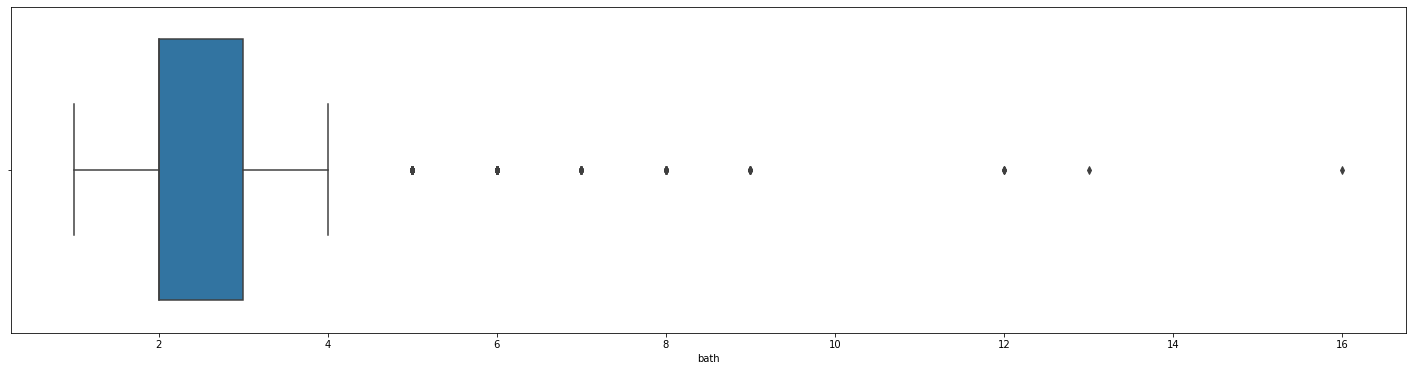

In [639]:
sns.boxplot(x="bath",data=df8)

In [640]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,sqft_price,sqft_per_bhk
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520,615.000000
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429,1750.000000
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330,602.000000
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689,1889.666667


In [641]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [642]:
df9.corr()["price"].sort_values(ascending=False)

price           1.000000
total_sqft      0.840997
sqft_price      0.716517
bath            0.601308
bhk             0.570145
sqft_per_bhk    0.485123
Name: price, dtype: float64

## Removal of added features as they are not much related to the price

In [643]:
df10 = df9.drop(['size','sqft_price','sqft_per_bhk'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Exploratory Data Analysis

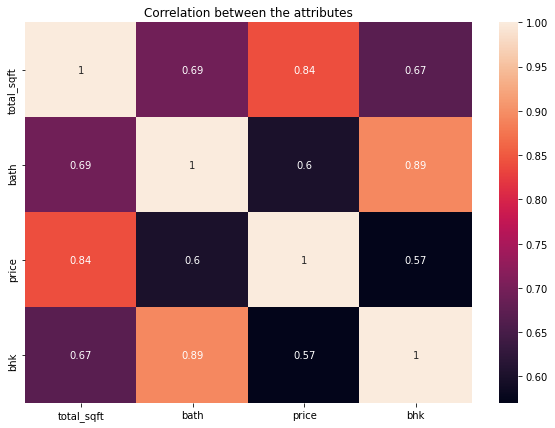

In [644]:
plt.figure(figsize=(10,7))
sns.heatmap(df10.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

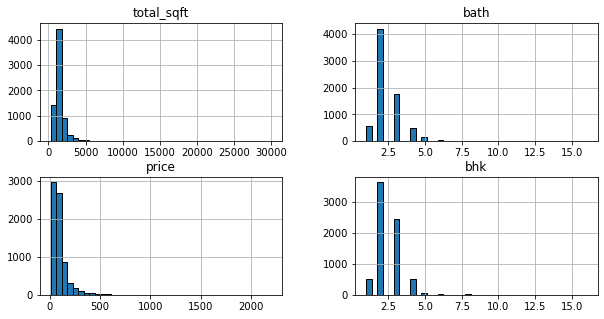

In [645]:
df10.hist(figsize=(10,5),bins=40,edgecolor="black")
plt.show()

<AxesSubplot:xlabel='total_sqft', ylabel='bhk'>

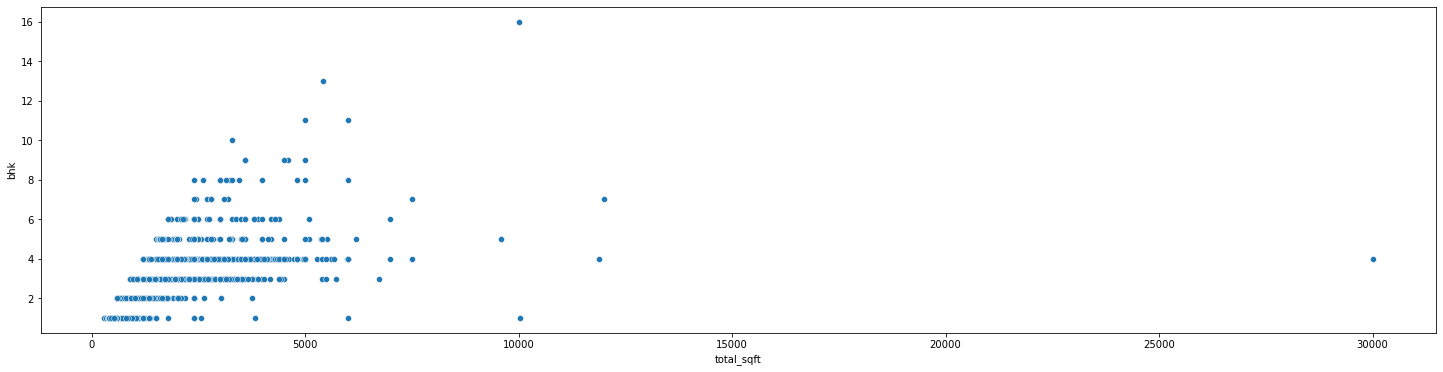

In [652]:
sns.scatterplot(x=df10['total_sqft'],y=df10['bhk'])

<AxesSubplot:xlabel='bath', ylabel='bhk'>

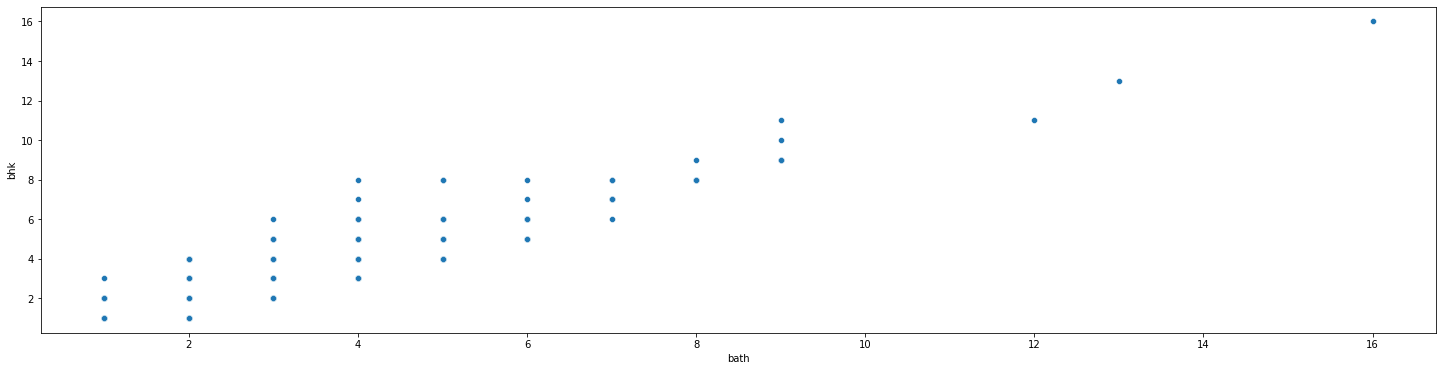

In [653]:
sns.scatterplot(x=df10['bath'],y=df10['bhk'])

<AxesSubplot:xlabel='bhk', ylabel='price'>

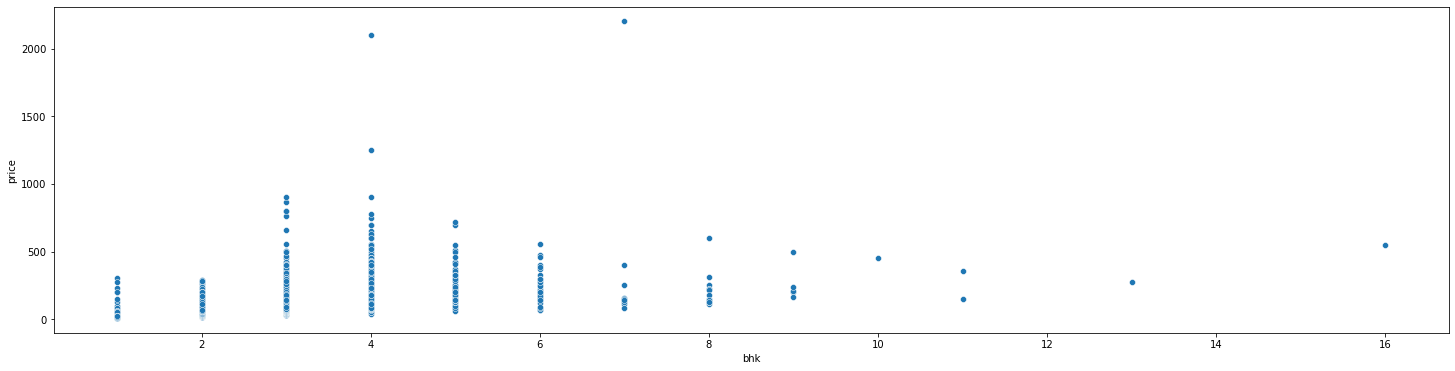

In [654]:
sns.scatterplot(x=df10['bhk'],y=df10['price'])

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

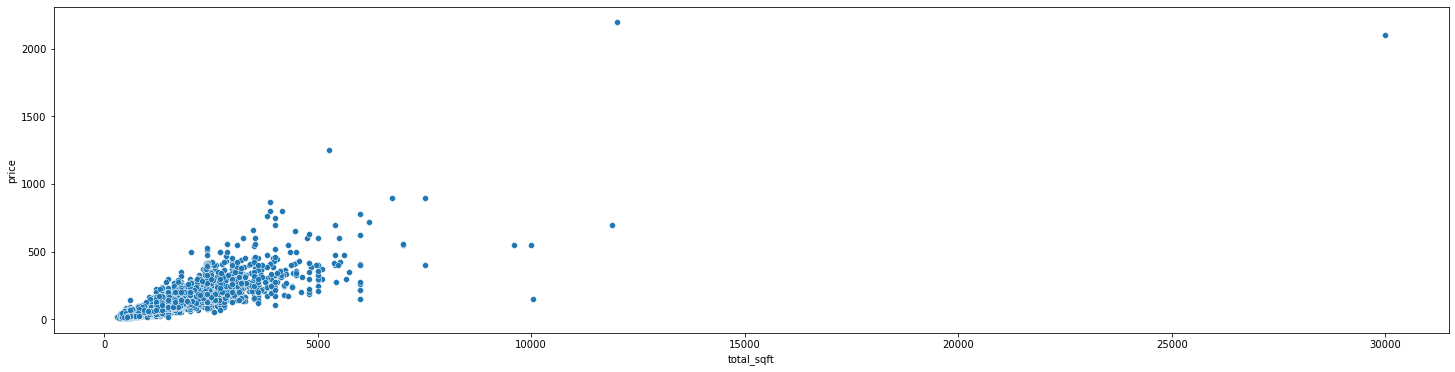

In [655]:
sns.scatterplot(x=df10['total_sqft'],y=df10['price'])

<AxesSubplot:xlabel='bhk'>

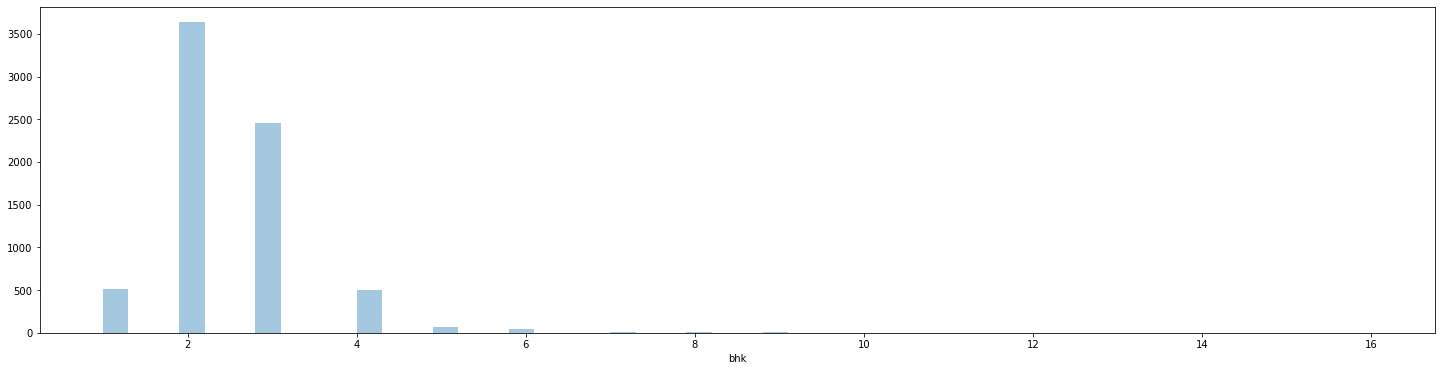

In [656]:
sns.distplot(df10['bhk'],kde=False)

## Handling Categorical data

#### Machine learning models cannot interpret text data so to deal with it we use one hot encoding i.e. dummies

In [657]:
df10.dtypes

location       object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

#### Using pandas dummies method

In [658]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [659]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [660]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [661]:
X = df12.drop(['price'],axis='columns')
X.head(3)
Y=X
Z=Y.drop(['bhk','bath','total_sqft'],axis='columns')

In [662]:
X.shape

(7251, 244)

In [663]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [664]:
len(y)
Z.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## COMPARISON OF MODELS

### TRYING DIFFERENT MODELS TO SELECT THE RIGHT ONE


## Splitting data

In [665]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [666]:
# put models in a dictionary
models={"Linear Regression":LinearRegression(),
        "Decision Tree":DecisionTreeRegressor(),
        "Random Forest":RandomForestRegressor(),
        "Lasso":Lasso(),
        "Ridge":Ridge()
       }

In [667]:
def fit_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluates given ml models
    models:dict of diff sklearn models
    x_train:training data(no labels)
    x_test:testing data (no labels)
    y_train:training labels
    y_test:testing labels
    """
    np.random.seed(42)
    
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [668]:
model_scores=fit_score(models,X_train,X_test,y_train,y_test)
model_scores

{'Linear Regression': 0.8452277697874312,
 'Decision Tree': 0.7275299287251968,
 'Random Forest': 0.7953681642132694,
 'Lasso': 0.7237775279429011,
 'Ridge': 0.843989744909689}

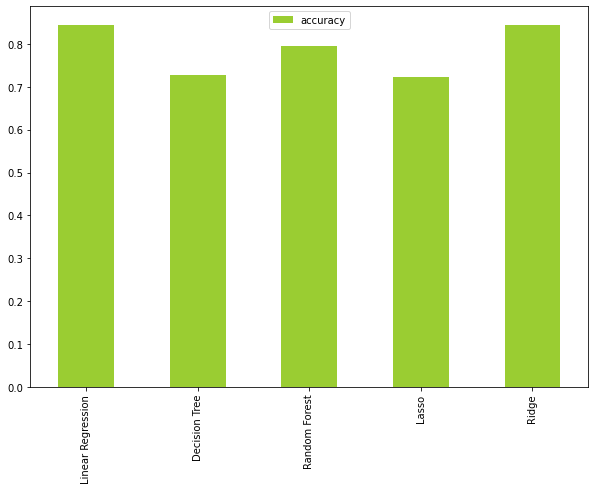

In [669]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar",figsize=(10,7),color="yellowgreen");

In [670]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
reg_model.score(X_test,y_test)

0.8452277697874312

In [671]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [672]:
def housing_price_prediction(location,sqft,bath,bhk):    
    loc= np.where(X.columns==location)[0][0]

    house_data = np.zeros(len(X.columns))
    house_data[0] = sqft
    house_data[1] = bath
    house_data[2] = bhk
    if loc >= 0:
        house_data[loc] = 1

    return reg_model.predict([house_data])[0]

In [673]:
housing_price_prediction('Ambedkar Nagar',5000, 5, 5)

378.48896002772113

## EXPORT MODEL TO PICKLE FILE

In [ ]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(reg_model,f)

## EXPORT LOCATION AND COLUMN INFO

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in Z.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))